In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, svm
from sklearn.preprocessing import StandardScaler 

# #############################################################################
# Import some data to play with

# The iris dataset
iris = datasets.load_iris()

In [4]:
X = iris.data

In [7]:
# Some noisy data not correlated to the target
E = np.random.uniform(0, 1, size=(len(iris.data), 50))

# Add the noisy data to the informative features
X = np.hstack((iris.data, E))

# normalize
scaler = StandardScaler()
X= scaler.fit_transform(X)

X.shape

(150, 54)

In [8]:
from sklearn import linear_model, svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import scipy as sp
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis


# Init classifier
classifiers = [linear_model.LogisticRegression(),svm.SVC(kernel='linear'), KNeighborsClassifier(), QuadraticDiscriminantAnalysis(), LinearDiscriminantAnalysis(solver="lsqr")]
names = ["Logistic Regression", "K Nearest Neighbors", "Support Vector Machines", "Quadratic Discrim Analysis", "Linear Discrim Analysis"]

# Split data -> 2/3 for learning & 1/3 for validation
X_train, X_test, y_train, y_test = train_test_split(X, iris.target, test_size=0.75, random_state=0)

for clf,name in zip(classifiers,names):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test) # predict the label of X_test from X_train and y_train
    error = accuracy_score(y_test, y_pred) # Compute the overall accuracy
    print('Errors for {1}: \t {0:.2f}'.format(error,name)) # \t means "tabular" space, and {0:.2f} 
                                                           # means we print only two first decimal

Errors for Logistic Regression: 	 0.68
Errors for K Nearest Neighbors: 	 0.70
Errors for Support Vector Machines: 	 0.54
Errors for Quadratic Discrim Analysis: 	 0.50
Errors for Linear Discrim Analysis: 	 0.20


/localdata/chatelaf/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/localdata/chatelaf/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/localdata/chatelaf/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


<IPython.core.display.Javascript object>


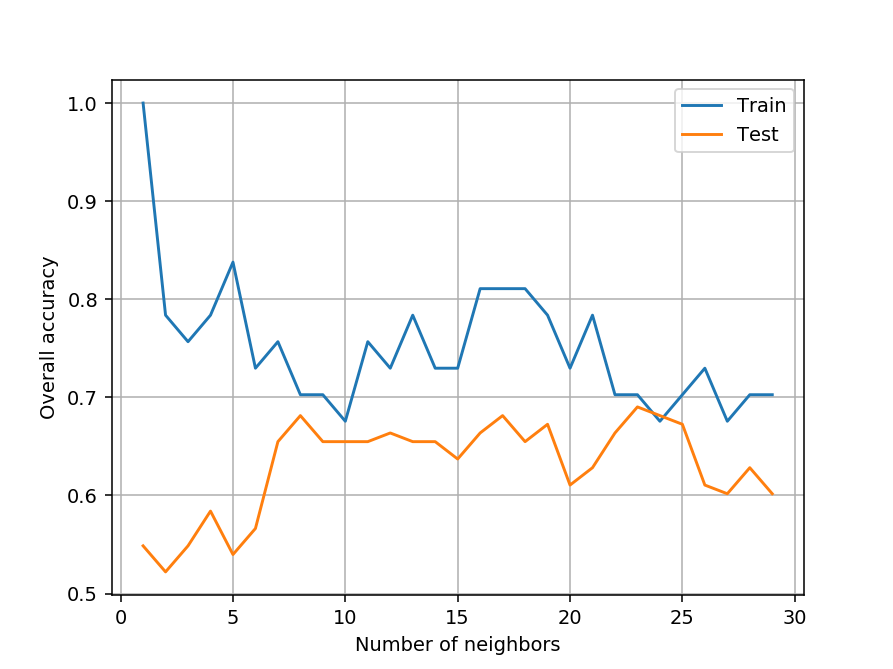

In [9]:
neighbors = sp.arange(1,30)
errors_train, errors_validation = [], []
for n_ in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_train)
    errors_train.append(accuracy_score(y_train, y_pred))
    
    y_pred = knn.predict(X_test)
    errors_validation.append(accuracy_score(y_test, y_pred))
    
plt.plot(neighbors,errors_train)
plt.plot(neighbors,errors_validation)
plt.legend(["Train", "Test"])
plt.xlabel("Number of neighbors")
plt.ylabel("Overall accuracy")
plt.grid()

In [13]:
from sklearn.linear_model import LogisticRegressionCV

clf= LogisticRegressionCV( cv=10, penalty='l1', solver='liblinear', multi_class='auto' )
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test) # predict the label of X_test from X_train and y_train
error = accuracy_score(y_test, y_pred) # Compute the overall accuracy
print('Errors for penalized Log Reg: \t {0:.2f}'.format(error,name)) 
    
print(clf.coef_)

Errors for penalized Log Reg: 	 0.85
[[ 0.          0.43148497 -1.89659092  0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.         -1.00083882  0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.         -0.14882834  0.          0.          0.
   0.08391178  0.          0.          0.          0.          0.
   0.         -0.12094748  0.          0.          0.          0.
   0.          0.          0. 